In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
#### 데이터 로드
df_mall = pd.read_csv('./data/pp_02_Mall_Customers.csv')
df_mall = df_mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df_mall

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [40]:
#### 표준화
# x_np = df_mall.iloc[:, :3].values
# x_np = (x_np - np.mean(x_np, axis=0)) / np.std(x_np, axis=0) # 표준화
# y_np = df_mall.iloc[:, 3].values.reshape(-1, 1)
scaler = StandardScaler()
np_mall = scaler.fit_transform(df_mall)
np_mall

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

c:\Users\maeng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\maeng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\maeng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\maeng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

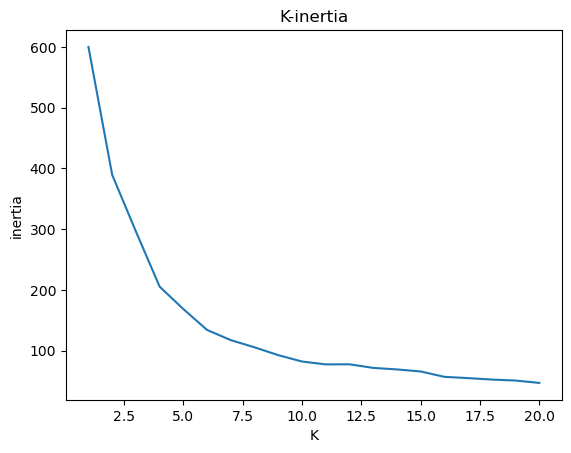

<Figure size 640x480 with 0 Axes>

In [41]:
#### k-means
range_clusters = range(1, 21)
list_inertia = []
for num_clusters in range_clusters:
    k_means = KMeans(num_clusters, random_state=777)
    k_means.fit(np_mall)
    list_inertia.append(k_means.inertia_) # 클러스터의 응집도
    
#### plt
plt.title("K-inertia")
plt.plot(range_clusters, list_inertia)
plt.xlabel("K")
plt.ylabel("inertia")
plt.show()
plt.clf()

클러스터의 개수를 5로 선택

c:\Users\maeng\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


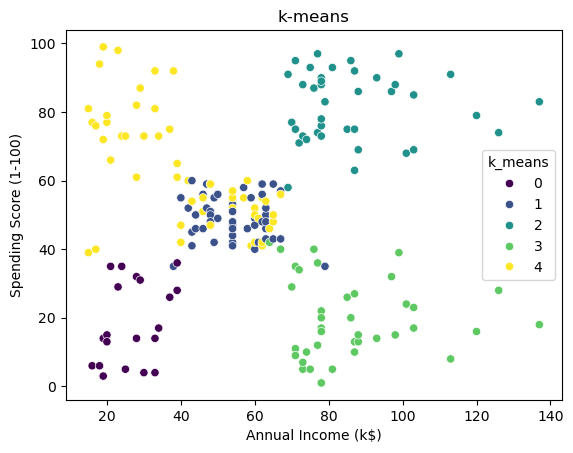

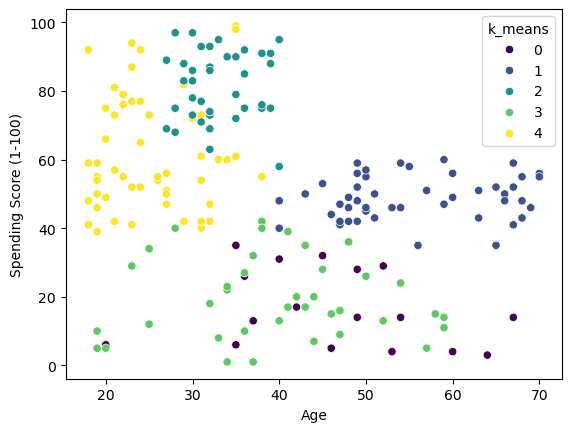

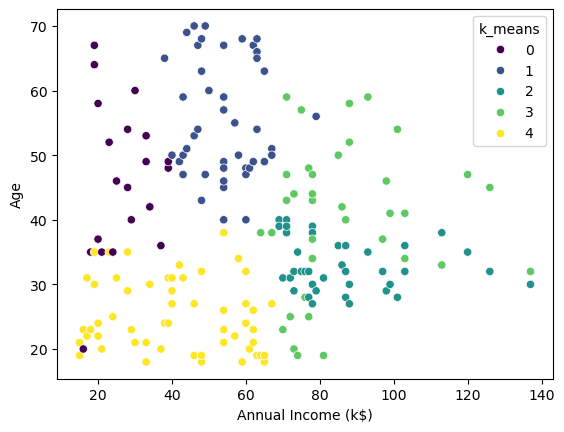

<Figure size 640x480 with 0 Axes>

In [50]:
#### k-means
k_means = KMeans(5, random_state=777)
k_means.fit(np_mall)
df_mall['k_means'] = k_means.labels_

#### plt
plt.title('k-means')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='k_means', data=df_mall, palette='viridis')
plt.show()
plt.clf()

sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='k_means', data=df_mall, palette='viridis')
plt.show()
plt.clf()

sns.scatterplot(x='Annual Income (k$)', y='Age', hue='k_means', data=df_mall, palette='viridis')
plt.show()
plt.clf()

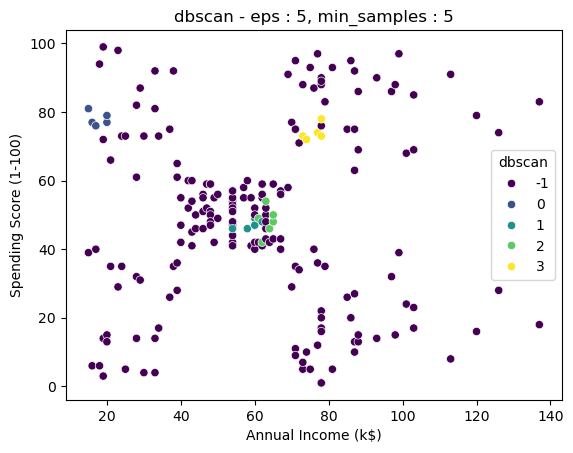

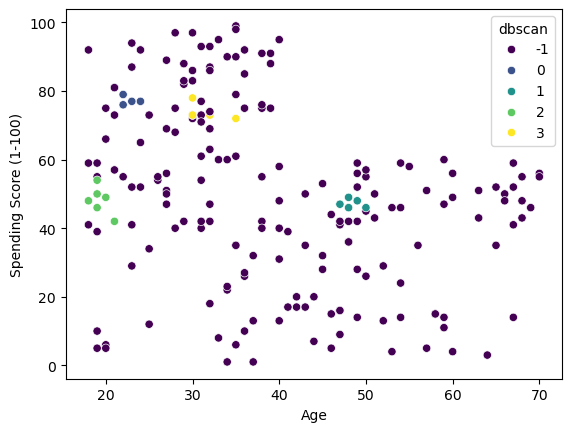

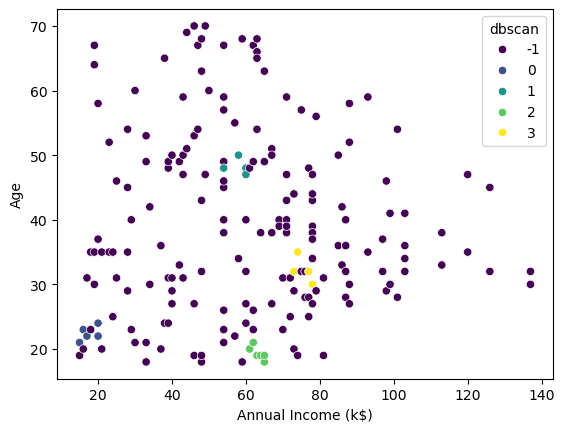

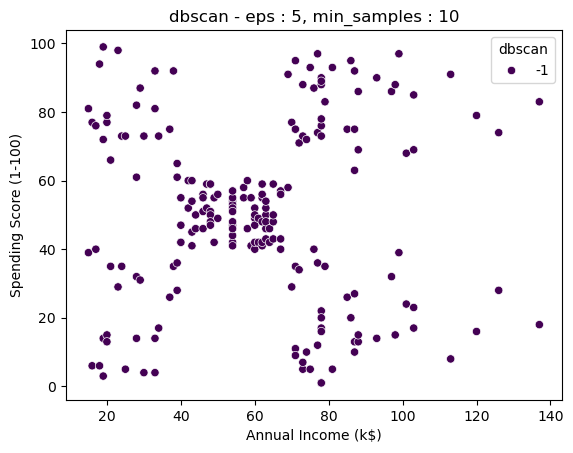

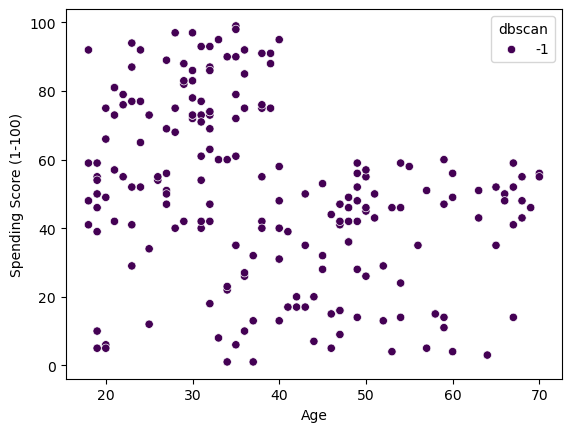

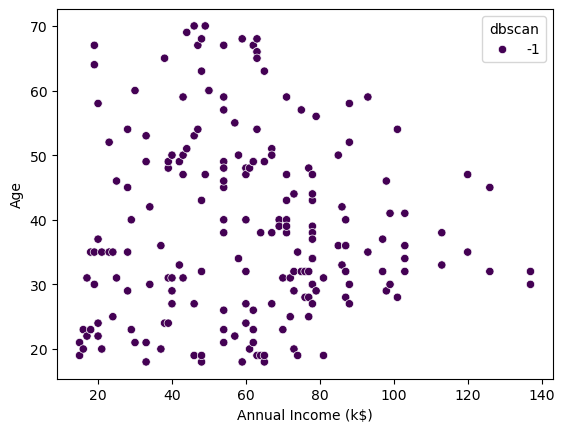

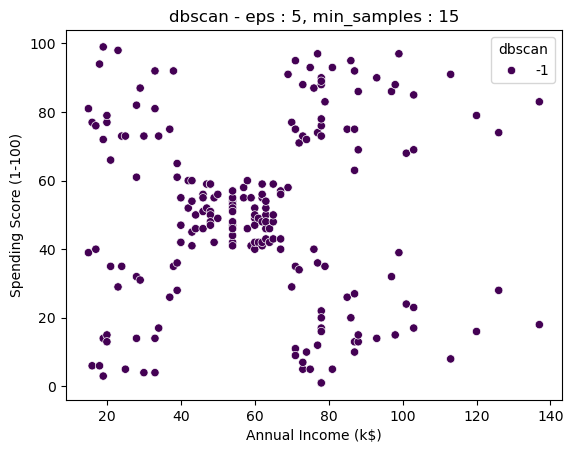

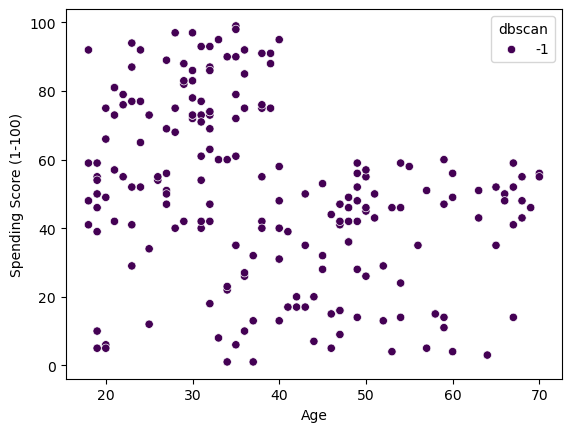

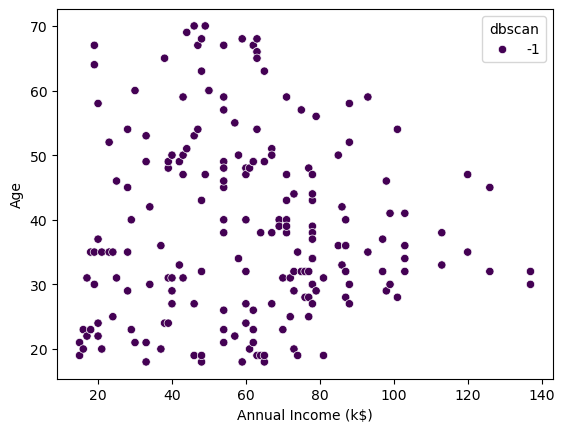

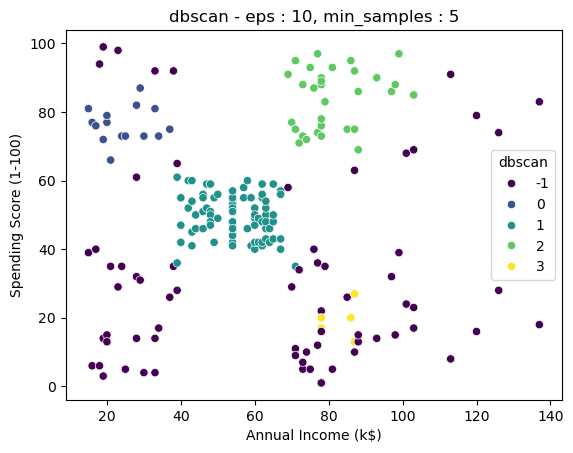

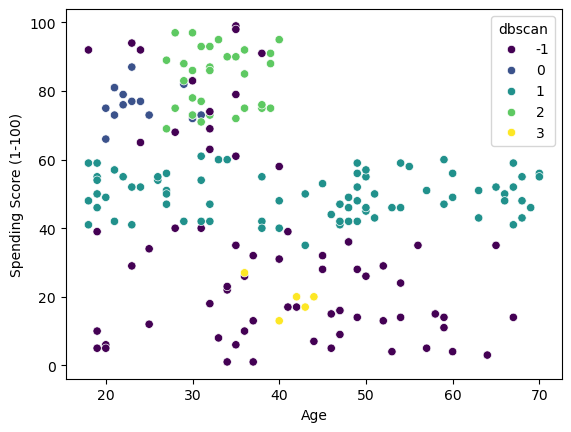

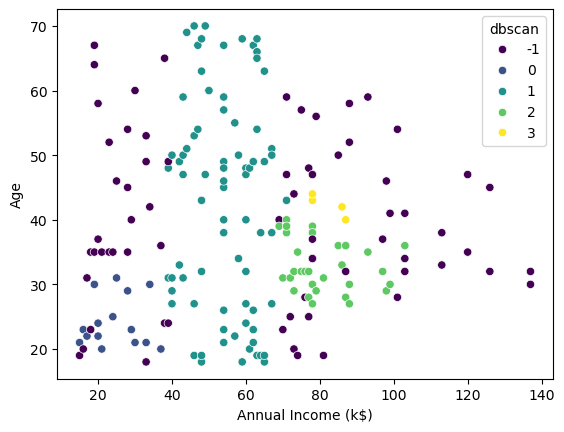

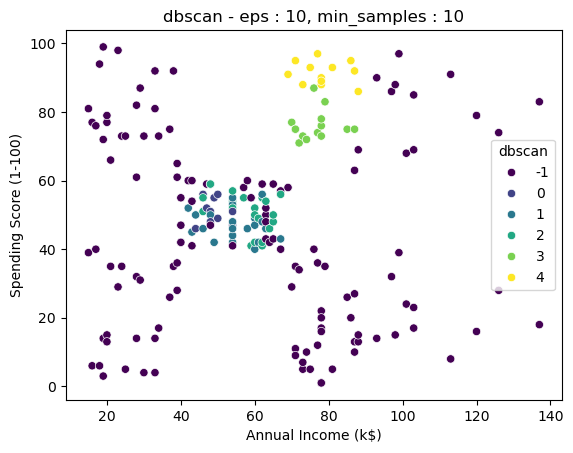

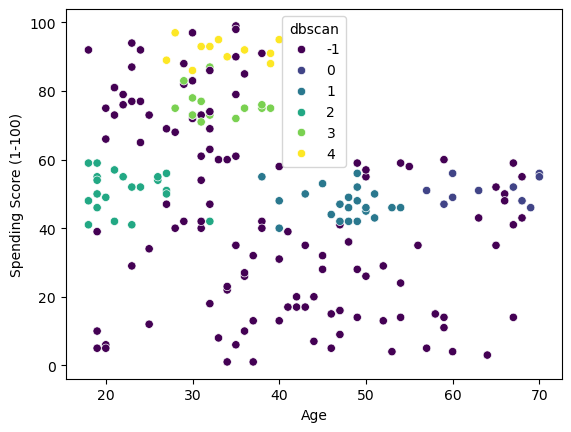

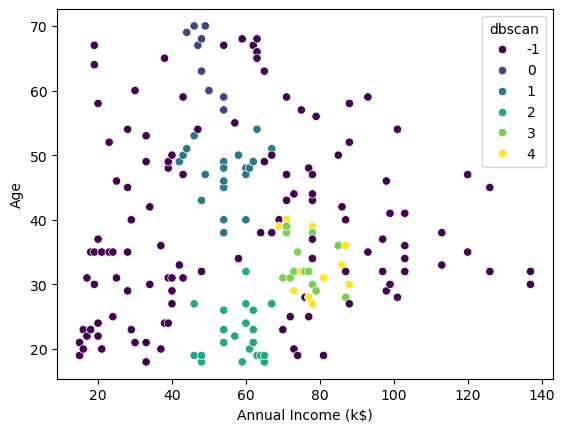

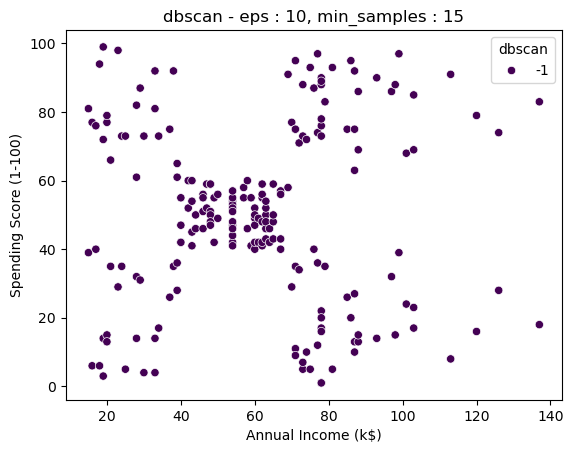

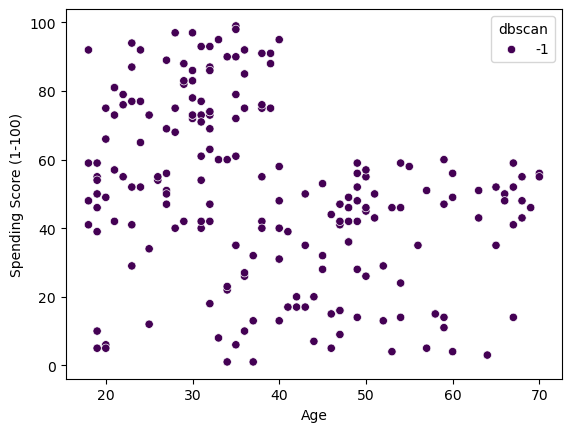

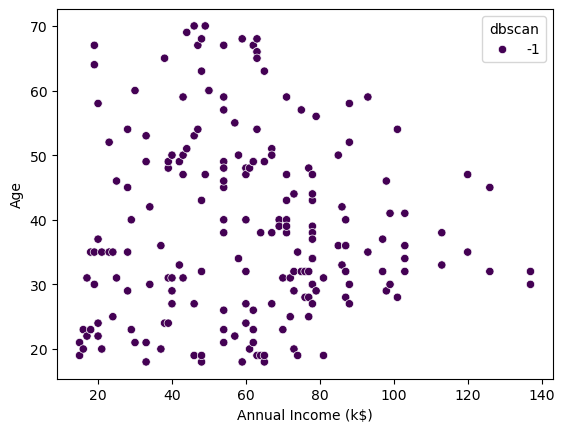

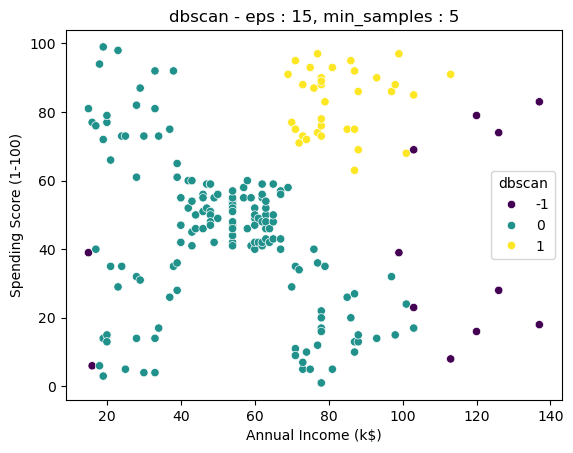

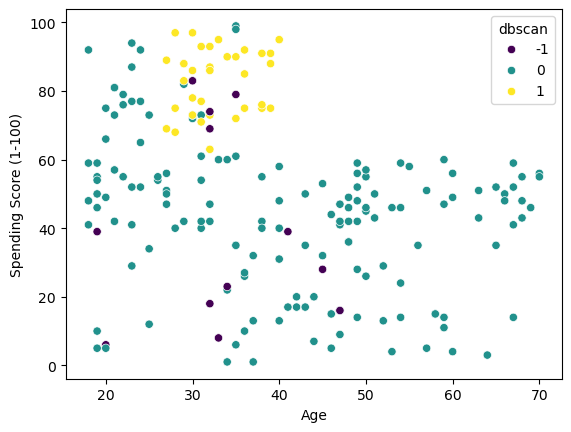

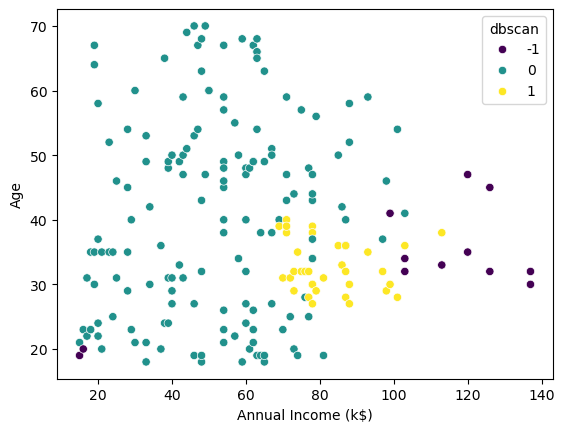

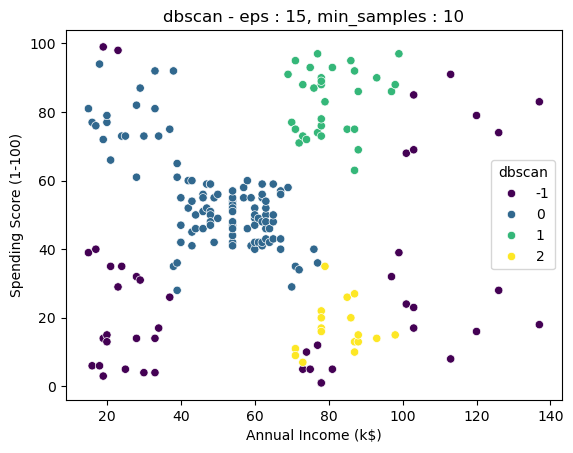

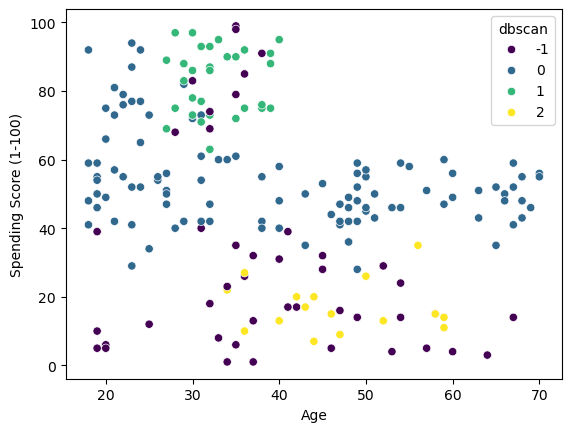

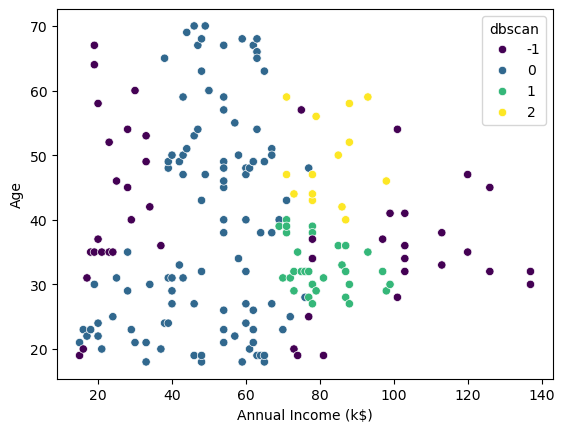

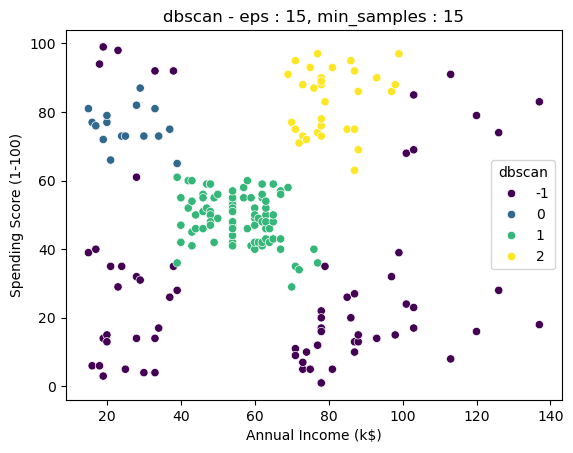

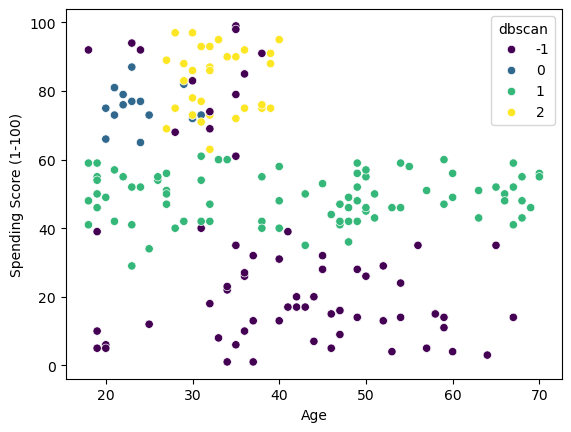

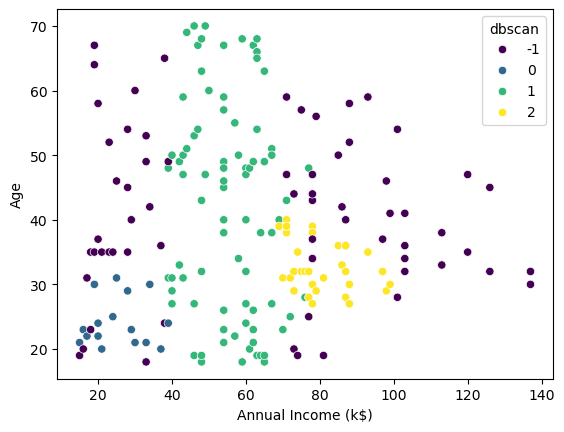

<Figure size 640x480 with 0 Axes>

In [55]:
#### dbscan
list_eps = [5, 10, 15]
list_min_samples = [5, 10, 15]
for eps in list_min_samples:
    for min_samples in list_min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        # dbscan.fit(np_mall)
        dbscan.fit(df_mall) # 표준화된 값을 사용하니 클러스터 구분이 전혀 안돼서 본래 값을 사용
        df_mall['dbscan'] = dbscan.labels_

        #### plt
        plt.title(f'dbscan - eps : {eps}, min_samples : {min_samples}')
        
        sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='dbscan', data=df_mall, palette='viridis')
        plt.show()
        sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='dbscan', data=df_mall, palette='viridis')
        plt.show()
        sns.scatterplot(x='Annual Income (k$)', y='Age', hue='dbscan', data=df_mall, palette='viridis')
        plt.show()
        
plt.clf()